1.Implemente la convolución unidimensional entre los siguientes polinomios:

P(x) = 2x^3+3x^2+6x+7 y h(x) = x+2

Tips:

• Para desplazar el polinomio h sobre el polinomio P puede usar la función shift de la librería scipy.ndimage.interpolation

• Para reflejar el polinomio h puede utilizar la función flip

In [1]:
import numpy as np
import scipy.ndimage.interpolation as sni

# Polinomios a convolucionar
p = np.array([2.,3.,6.,7.])
h = np.array([1.,2.])

# Organizando los polinomios para la convolucion
hf =np.flip(h,0)
pn = np.append([0],p)
pn = np.append(pn,[0])
x=np.zeros(len(pn)-len(hf))
hn=np.concatenate((hf,x),axis=0)
mc=np.empty(len(pn)-1)
for k in range (len(hn)-1):
    mc[k]=np.sum(np.multiply(pn,sni.shift(hn,k)))
    #print(sni.shift(hn,k).astype(np.int))
    
print(mc)    

[ 2.  7. 12. 19. 14.]


2.Haga un sencillo filtrado (detección de bordes) a la imagen lenna.png utilizando el kernel Sobel y la convolución en dos dimensiones. Kernel Sobel horizontal: sobel_h = [[-1,-2,-1],[0,0,0],[1,2,1]] Kernel Sobel vertical: sobel_v = [[-1,0,1],[-2,0,2],[-1,0,1]] • Para poder trabajar con la imagen debe bajarla a escala de grises eliminando la última componente de la matriz de la imagen. • Para cargar la imagen puede utilizar la función pylab.imread('lenna.png’) • Para mostrar una imagen puede utilizar la función pylab.imshow(arreglo_imagen, cmap=pyl.cm.gray)

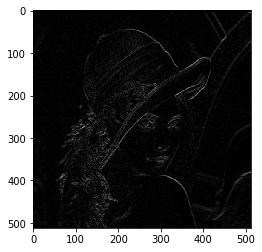

In [5]:
import numpy as np
import pylab

h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
v = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img=pylab.imread('lenna.png')
#print(img.shape)
img_g=img[:,:,1]
#print(img_g.shape)
#pylab.imshow(img_g,cmap=pylab.cm.gray)

from scipy import signal
m1=np.ones(np.array(img_g.shape)+2)
#print(m1.shape)
m1[1:m1.shape[0]-1,1:m1.shape[1]-1]=img_g

Nnh=np.zeros(img.shape[0:2])
Nnv=np.zeros(img.shape[0:2])
for i in range (len(m1)-2):
    for j in range (len(m1)-2):
        winh=sum(sum(h*m1[i:i+3,j:j+3]))
        winv=sum(sum(h*m1[i:i+3,j:j+3]))
        Nnh[i,j]=winh
        Nnv[i,j]=winv

#pylab.imshow(Nnh,cmap=pylab.cm.gray)
#pylab.imshow(Nnv,cmap=pylab.cm.gray)

borde=(Nnh**2+Nnv**2)**(1/2)
pylab.imshow(borde,cmap=pylab.cm.gray)

3.En el siguiente enlace: https://nptel.ac.in/courses/111107062/module3/lecture1/lecture1.pdf se describe un algoritmo que sirve para calcular el valor propio (eigenvalue) dominante de una matriz cuadrada de dimensión 3, utilice la librería numpy para implementar ese algoritmo en Python. Utilizando su función encuentre el valor propio de la matriz:

In [6]:
import numpy as np
D =np.array([[1,-3,8],[2,-5,9],[3,-6,10]])
np.linalg.eig(D)

(array([ 7.35338292+0.j        , -0.67669146+0.70287373j,
        -0.67669146-0.70287373j]),
 array([[-0.54061344+0.j        , -0.80821236+0.j        ,
         -0.80821236-0.j        ],
        [-0.55079981+0.j        , -0.38494602-0.38859894j,
         -0.38494602+0.38859894j],
        [-0.63589046+0.j        ,  0.02503559-0.21673351j,
          0.02503559+0.21673351j]]))

In [7]:
import numpy as np
D =np.array([[1,-3,8],[2,-5,9],[3,-6,10]])
# D =np.array([[4,-5],[2,-3]])
x=np.zeros(len(D))
m=0
x[0]=1
for i in range(50):
    f=D.dot(x)
    if(abs(m-np.max(f))>0.01):
        m=np.max(f)
        x=f/m
    else:
        break
print(m)
print(i)

7.351063829787234
5
